## Part 1: Analyze the network

- Present an analysis/description of the network of bands/artists using tools from Lecture 5. Imagine that you have been tasked with presenting the important facts about the network to an audience who knows about network science, but doesn't know about this particular network.
    - It's OK to also use basic concepts like degree distributions (even though they're from week 4) in your analysis. That way you can make the analysis a standalone, coherent thing.
    - I would like you to include concepts like centrality and assortativity in your analysis.
    - Use a network backbone in your analysis.
    - In addition to standard distribution plots (e.g. degree distributions, etc), your analysis should also include at least one network visualization (but it doesn't have to display the entire network, you can also visualize a network backbone).
- **Note**: As I write above, an important part of the exercise consists is selecting the right elements of the lecture to create a meaningful analysis. So don't solve this part by going exhaustive and just calculating everything you can think of in one massive analysis. Try to focus on using what you've learned to characterize the network.

### Analysis and visualization of the original network 

In [ ]:
# Count the total number of nodes and edges in the original directed network
n_nodes = rock_artists_graph.number_of_nodes()
n_edges = rock_artists_graph.number_of_edges()

# Print basic information about the graph structure
print(f"Number of nodes: {n_nodes}")
print(f"Number of edges: {n_edges}")

# Check whether the network is directed (or not
print("Is directed:", nx.is_directed(rock_artists_graph))

#Convert the directed graph into an undirected version.
rock_artists_graph_undirected = rock_artists_graph.to_undirected()

#Identify the giant connected component. This often helps to focus on the main cluster.
largest_cc_nodes = max(nx.connected_components(rock_artists_graph_undirected), key=len)
giant_connected_component = rock_artists_graph_undirected.subgraph(largest_cc_nodes).copy()


# We created a subgraph containing only the nodes of the largest connected component.
# The .copy() part ensures that the subgraph is independent from the original graph.
print(f"GCC nodes: {giant_connected_component.number_of_nodes()}")
print(f"GCC edges: {giant_connected_component.number_of_edges()}")
print(f"GCC density: {nx.density(giant_connected_component):.4f}")

density = nx.density(rock_artists_graph)
avg_degree = sum(dict(rock_artists_graph.degree()).values()) / n_nodes

print(f"Network density: {density:.4f}")
print(f"Average degree: {avg_degree:.2f}")


Number of nodes: 485
Number of edges: 7507
Is directed: True
GCC nodes: 485
GCC edges: 6215
GCC density: 0.0530
Network density: 0.0320
Average degree: 30.96


Our directed network contains 485 nodes and 7507 edges. Each node represents a rock band, and the edges corresponds to hyperlinks between their Wikipedia pages. Just out of curiousity we looked up its largest undirected connected component (GCC), which includes 485 nodes and 6215 edges, with a density of 0.53.
Overall, the network is sparse, it's density is around 0.03, and the average degreeof approximately 31, indicates that most artists are connected to a moderate number of others, while a few very connected hubs likely dominate its structure.

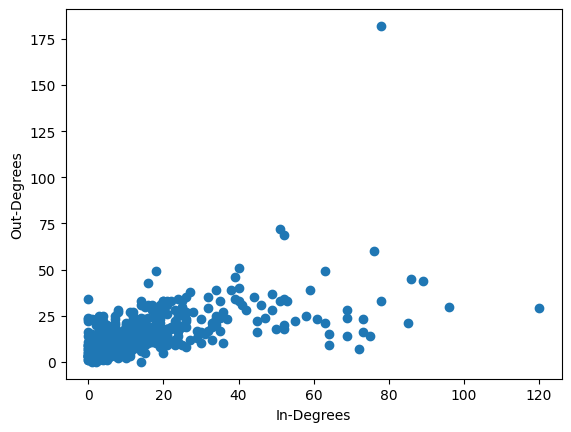

**Figure xx.:** *The relationship between in- and out-degrees of all nodes.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Extract the in-degree and out-degree values
x_values = rock_artists_graph_attributes["in_degrees"]
y_values = rock_artists_graph_attributes["out_degrees"]

# we created a scatter plot to visualize the relationship between in-degree and out-degree for all nodes.
plt.scatter(x_values, y_values)
plt.xlabel("In-Degrees")
plt.ylabel("Out-Degrees")
plt.show()
display(Markdown("**Figure xx.:** *The relationship between in- and out-degrees of all nodes."))

As Figure xx. shows, most artists have both few incoming and outgoing links, clustered near the origin.
A small number of nodes have extremely high out-degree or high in-degree,
suggesting a highly heterogeneous, hub-dominated structure.

In [ ]:
from scipy import stats
#the original network
#average in degree
total_in_degree = sum(in_deg.values())
avg_in_degree = total_in_degree / rock_artists_graph.number_of_nodes()
print(f"The average in-degree is: ", avg_in_degree)

#median in degree
median_in_degree = np.median(list(in_deg.values()))
print(f"The median indegree is: ", median_in_degree)

#mode in degree
mode_in_degree = stats.mode(list(in_deg.values()), keepdims=False).mode
print(f"The mode indegree is: ", mode_in_degree)
 
#minimum in degree
min_in_degree = min(in_deg.values())
print(f"The minimum in-degree is: ", min_in_degree)

#maximum  degree
maximum_in_degree = max(in_deg.values())
print(f"The maximum in-degree is: ", maximum_in_degree)

#minimum out degree
min_out_degree = min(out_deg.values())
print(f"The minimum out-degree is: ", min_out_degree)

#maximum out degree
maximum_out_degree = max(out_deg.values())
print(f"The maximum out-degree is: ", maximum_out_degree)

The average in-degree is:  15.478350515463918
The median indegree is:  10.0
The mode indegree is:  4
The minimum in-degree is:  0
The maximum in-degree is:  120
The minimum out-degree is:  0
The maximum out-degree is:  182


The average in-degree is 15.5, the median is 10, and the mode is 4. They are much lower, showing that most artists receive only few incoming links while a small number act as major hubs. The maximum in-degree of 120 and maximum out-degree of 182 highlight the strong asymmetry and heterogeneity in connectivity. This is typical of scale-independent, node-dominated networks.

In [ ]:
# Degree centrality
deg_cent = nx.degree_centrality(rock_artists_graph)
print(sorted(deg_cent.items(), key=lambda x: x[1], reverse=True)[:5])

# Betweenness centrality
bet_cent = nx.betweenness_centrality(rock_artists_graph)
print(sorted(bet_cent.items(), key=lambda x: x[1], reverse=True)[:5])

# Eigenvector centrality (directed)
eig_cent_in = nx.eigenvector_centrality(rock_artists_graph, max_iter=1000)
print(sorted(eig_cent_in.items(), key=lambda x: x[1], reverse=True)[:5])


[('Led Zeppelin', 0.30434782608695654), ('Black Sabbath', 0.27950310559006214), ('Queen (band)', 0.2732919254658385), ('Metallica', 0.26915113871635615), ('Bob Dylan', 0.2567287784679089)]
[('Deep Purple', 0.04328761792645038), ('Queen (band)', 0.03973736999660883), ('Alice in Chains', 0.036860106969053424), ("Guns N' Roses", 0.03630642173933055), ('Jimi Hendrix', 0.03398917778239813)]
[('Led Zeppelin', 0.2311608378471955), ('Black Sabbath', 0.19389740387918397), ('Queen (band)', 0.18215207768672), ('Metallica', 0.18091295084493206), ('David Bowie', 0.15963732159110777)]


In [ ]:
import powerlaw
in_degree_values = list(in_deg.values())
# We removed a few nodes with zero in-degree, since log-based power-law fitting can't handle zero values
in_degree_values = [val for val in in_degree_values if val >0]
in_degree_results = powerlaw.Fit(in_degree_values, discrete=True)
print (f"In-degree results: ", in_degree_results.power_law.alpha)

in_degree_xmin_value = in_degree_results.power_law.xmin
print (f"Minimum in-degree value: ", in_degree_xmin_value)

# Compute the KS statistic, which quantifies how well the data fits the theoretical power-law model.
in_degree_KS_value = in_degree_results.power_law.KS()
print (f"In-degree KS value: ", in_degree_KS_value)


out_degree_values = list(out_deg.values())
# Convert to list and remove zero-degree nodes for the same reason as above
out_degree_values = [val for val in out_degree_values if val >0 ]
out_degree_results = powerlaw.Fit(out_degree_values, discrete=True)
print (f"Out-degree results: ", out_degree_results.power_law.alpha)

#total degree distribution
total_deg = dict(rock_artists_graph.degree())   
total_degree_values = list(total_deg.values())
total_degree_values = [val for val in total_degree_values if val > 0]  # Remove zero values
total_degree_results = powerlaw.Fit(total_degree_values, discrete=True)
print (f"Total degree results: ", total_degree_results.power_law.alpha)


Calculating best minimal value for power law fit
In-degree results:  2.5414318832249974
Minimum in-degree value:  15.0
In-degree KS value:  0.06309536004771904
Calculating best minimal value for power law fit
Out-degree results:  4.086319778080128
Calculating best minimal value for power law fit
Total degree results:  5.108196590325916


The power-law fitting shows that both the in- and out-degree distributions follow a long-tailed pattern.
This means that most artists have only a few links, while a small number of hubs have very many connections.

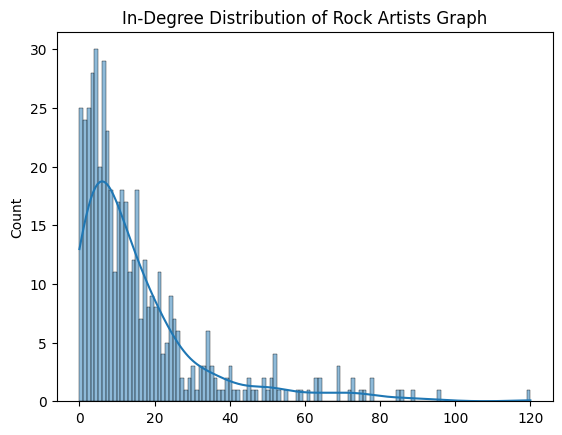

**Figure 1.1:** *In-Degree Distribution of Rock Artists Graph*

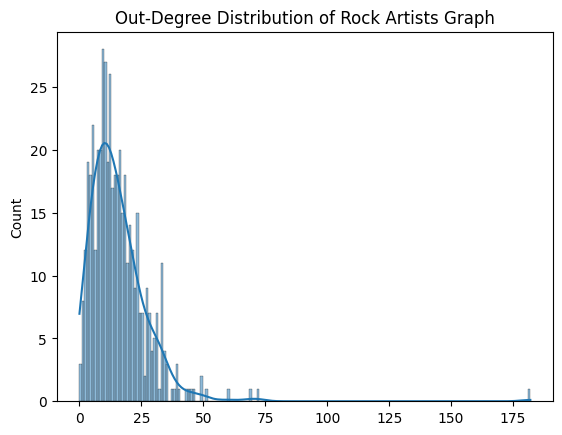

**Figure 1.2:** *Out-Degree Distribution of Rock Artists Graph*

In [ ]:
#use basic concepts like degree distributions in analysis

from IPython.display import display_markdown
from IPython.display import display, Markdown

#We defined a reusable function to plot a degree distribution to avoid redundancy and have a cleaner code
def plot_degree_distribution(degrees, title):
    import seaborn as sns
    import matplotlib.pyplot as plt

    sns.histplot(degrees, bins=(max(degrees) - min(degrees) + 1), kde=True)
    plt.title(title)
    plt.show()
    
#This shows how many incoming connections each node has 
plot_degree_distribution(rock_artists_graph_attributes["in_degrees"], "In-Degree Distribution of Rock Artists Graph")
display(Markdown("**Figure 1.1:** *In-Degree Distribution of Rock Artists Graph*"))

# This visualizes how many outgoing connections each node has 
plot_degree_distribution(rock_artists_graph_attributes["out_degrees"], "Out-Degree Distribution of Rock Artists Graph")
display(Markdown("**Figure 1.2:** *Out-Degree Distribution of Rock Artists Graph*"))


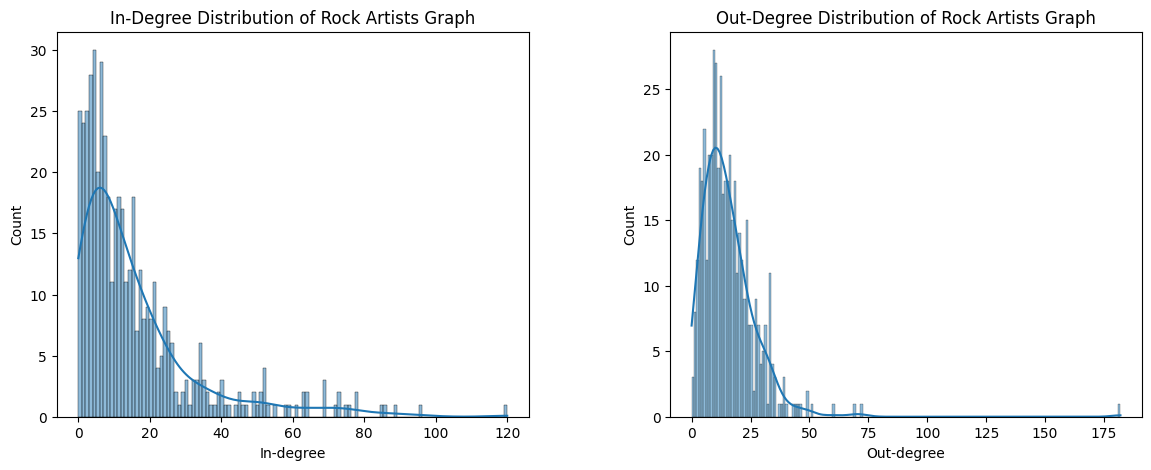

**Figure 1.1:** *In-Degree Distribution of Rock Artists Graph*

**Figure 1.2:** *Out-Degree Distribution of Rock Artists Graph*

In [ ]:
# EZ UGYANAZ AMI FENT, CSAK EGYMÁS MELLETT VANNAK AZ ÁBRÁK
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

in_deg = rock_artists_graph_attributes["in_degrees"]
out_deg = rock_artists_graph_attributes["out_degrees"]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(in_deg, bins=max(in_deg) - min(in_deg) + 1, kde=True, ax=axes[0])
axes[0].set_title("In-Degree Distribution of Rock Artists Graph")
axes[0].set_xlabel("In-degree")
axes[0].set_ylabel("Count")


sns.histplot(out_deg, bins=max(out_deg) - min(out_deg) + 1, kde=True, ax=axes[1])
axes[1].set_title("Out-Degree Distribution of Rock Artists Graph")
axes[1].set_xlabel("Out-degree")
axes[1].set_ylabel("Count")

plt.subplots_adjust(wspace=0.3)
plt.show()

display(Markdown("**Figure 1.1:** *In-Degree Distribution of Rock Artists Graph*"))
display(Markdown("**Figure 1.2:** *Out-Degree Distribution of Rock Artists Graph*"))


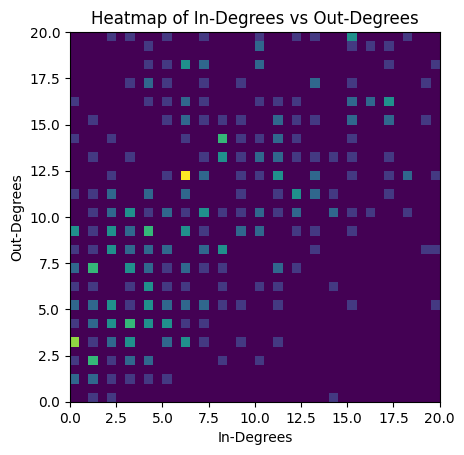

In [ ]:
#We created a heatmap, that shows the joint distribution of in-degrees and out-degrees
in_deg = rock_artists_graph_attributes["in_degrees"]
out_deg = rock_artists_graph_attributes["out_degrees"]

#Convert the degree dictionaries to lists of numerical values, we will use this as an input for the 2D histogram
x_val = list(in_deg.values())
y_val = list(out_deg.values())

#Compute a 2D histogram (density map) of in-degrees vs out-degrees.
heatmap, xedges, yedges = np.histogram2d(x_val, y_val, bins=40, range = [[0,20],[0,20]])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.xlabel('In-Degrees')
plt.ylabel('Out-Degrees')
plt.title('Heatmap of In-Degrees vs Out-Degrees')
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

#### General conclusion based on the above analysis

The directed rock artist network has 485 nodes and 7,507 edges, where each node represents a rock band and each edge shows a hyperlink between their Wikipedia pages.
When we looked at the largest undirected connected component (GCC), it included all 485 nodes and 6,215 edges, with a density of 0.53, meaning most of the main network is well connected.
However, the overall network is still sparse, with a density of only 0.03. The average degree of about 31 shows that most artists are connected to a few others, while some highly connected hubs dominate the structure.

A few nodes have very high in- or out-degrees, which makes the network uneven.
The average in-degree is 15.5, the median is 10, and the mode is 4, which means most artists receive only a few incoming links, as shown in Figure xx, forming a dense cluster near the origin. The maximum in-degree (120) and maximum out-degree (182) also show how unequal the network is.

Finally, the power-law fitting shows a long-tailed pattern for both in- and out-degrees. This means most artists have only a few links, but a small number of hubs have very many, which is typical for scale-free networks where a few key nodes hold the system together.

### Giant connected component

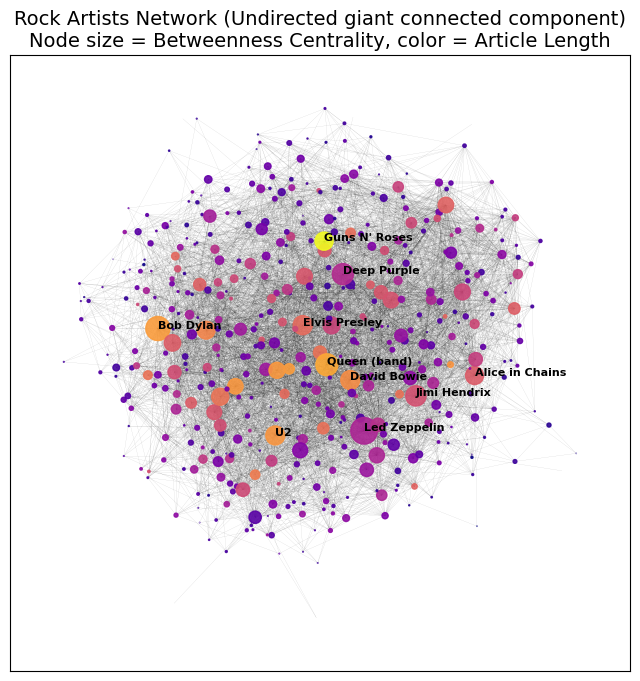

In [ ]:
#For some analysis we use the GGC, because it shows the main connected part of the network where most nodes are linked,
# making the results more accurate and easier to interpret.

largest_cc_nodes = max(nx.connected_components(rock_artists_graph_undirected), key=len)
giant_connected_component = rock_artists_graph_undirected.subgraph(largest_cc_nodes).copy()

#We computed betweenness centrality on the GCC, because smaller parts or isolated nodes would give meaningless or unstable values.
betweenness_centrality = nx.betweenness_centrality(giant_connected_component)
node_size_bc = [betweenness_centrality[node] * 8000 for node in giant_connected_component.nodes()]
node_colors = []
for node in rock_artists_graph.nodes():
    grad_word_count = rock_artists_graph.nodes[node]['word_count']
    node_colors.append(grad_word_count)

# Compute 2D layout with ForceAtlas2, because the Week 5 exercise specifically asked to use this layout for visualization.
pos = nx.forceatlas2_layout(giant_connected_component, gravity=10)

plt.figure(figsize=(8,8))
nx.draw_networkx_nodes(
    giant_connected_component, pos,
    node_size=node_size_bc,
    node_color=node_colors,
    cmap="plasma",
    alpha=0.9
)
nx.draw_networkx_edges(giant_connected_component, pos, width=0.1, alpha=0.3)

# Showing all node labels would make the plot unreadable, so we only display the labels of the 10 most central nodes.
top_labels = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
for node, bc in top_labels:
    plt.text(
        pos[node][0],
        pos[node][1],
        node,
        fontsize=8,
        fontweight="bold",
        color="black"
    )

plt.title("Rock Artists Network (Undirected giant connected component)\nNode size = Betweenness Centrality, color = Article Length", fontsize=14)
plt.show()


### Backbone analysis and visualization

In [ ]:
#We create a weighted undirected graph based on the betweenness centrality
weighted_rock_artist_graph1 = rock_artists_graph.to_undirected(reciprocal=False, as_view=True)

We chose Weighted Network 1 because it uses edge betweenness centrality to set the weights.
This means that edges that connect important parts of the network get higher values.
It helps to keep the most meaningful connections and makes the main structure of the Rock Artists network clearer.

In [ ]:
#We calculated the assortavity coefficient of the weighted network
#This measures whether the nodes tend to connect to others with similar degree values
assortavity_coefficient_w1 = nx.degree_assortativity_coefficient(weighted_rock_artist_graph1)
print("The assortavity coefficient of the weighted rock artists graph based on betweenness centrality is: ", assortavity_coefficient_w1)

The assortavity coefficient shows, that the nodes connect to other nodes with different properies.

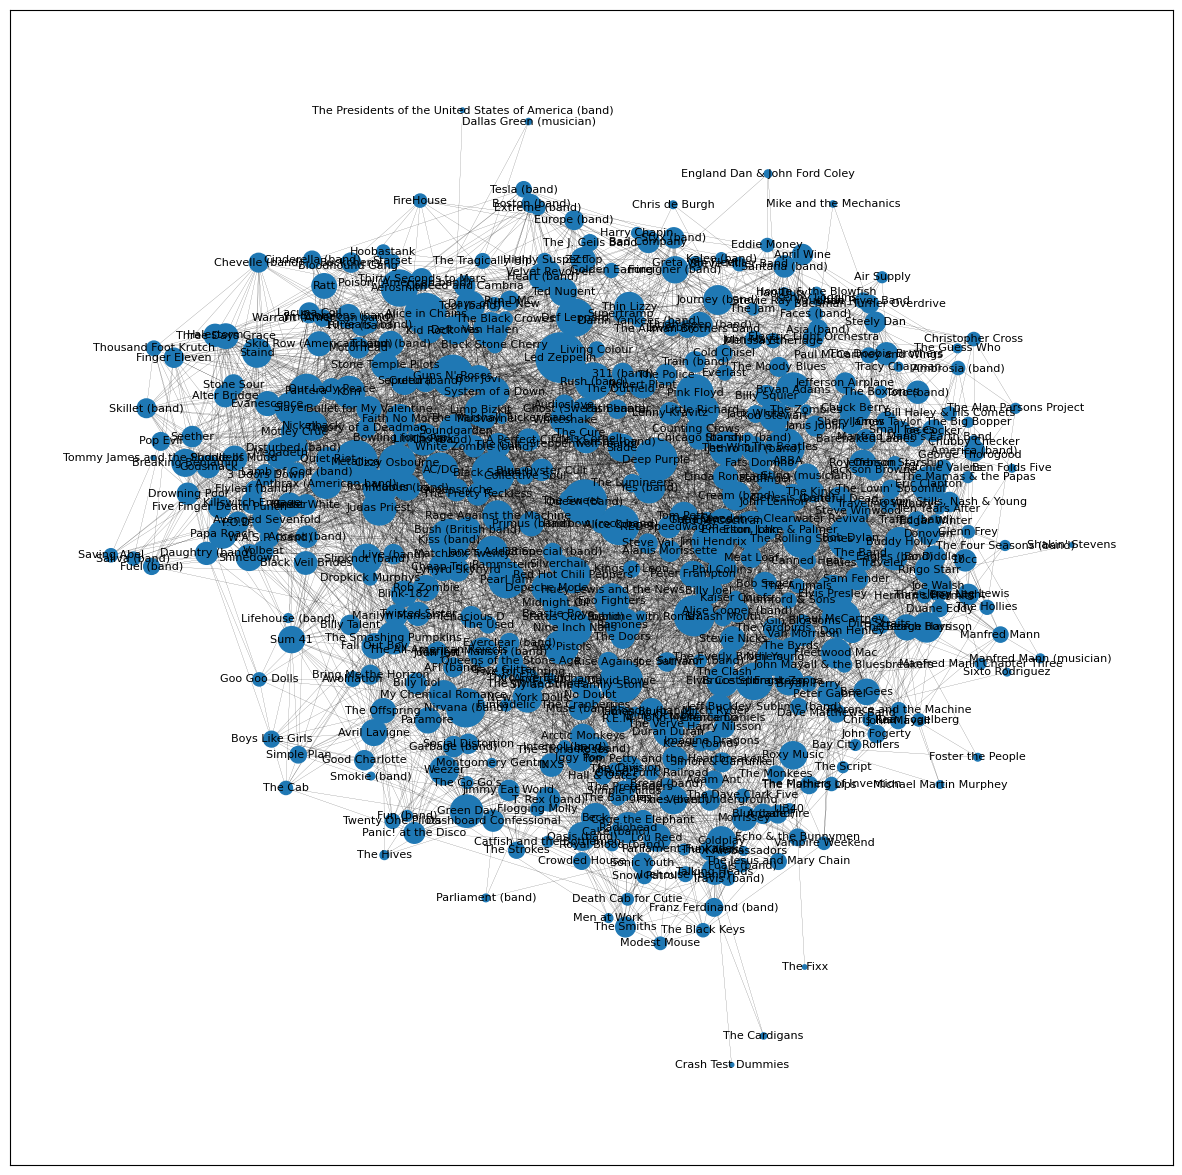

**Figure 2:** *Plot of the weighted rock artist graph based on the betweenness centrality*

In [ ]:
#plotting the network using forceatlas2 layout, the size according to the total degree.

#We calculated the node size based on total degree and multiplied by 10 simply scales the sizes to make them visually distinguishable on the plot.
node_size_total_degree = [weighted_rock_artist_graph1.degree(node) * 10 for node in weighted_rock_artist_graph1.nodes()]

# We computed the node positions using the ForceAtlas2 layout algorithm.
# This layout spreads the nodes based on their connections, by that means, similar nodes are placed closer together.
# The "gravity" parameter helps by pulling nodes toward the center, that keeps the layout compact
pos = nx.forceatlas2_layout(weighted_rock_artist_graph1, gravity = 10)
plt.figure(1, figsize=(15,15))
nx.draw_networkx(weighted_rock_artist_graph1, pos, width=0.1, node_size = node_size_total_degree, font_size= 8)
plt.show()
display(Markdown("**Figure 2:** *Plot of the weighted rock artist graph based on the betweenness centrality*"))

In [ ]:
# 3 column of the table: src, trg, weight
# We prepared a table because the disparity_filter function requires the input data to be in a tabular format.
# This table was then saved as a CSV file and loaded using the read function from the backboning library.
# we use tab as separator as it is required in the read me

import pandas as pd

#Create an empty list to store edge information for creating a DataFrame
edge_data = []
with open("./weighted_network1.txt", "w", encoding="utf-8") as f:
    f.write("src\ttrg\tweight\n")
    for u, v , data in weighted_rock_artist_graph1.edges(data=True):
        weight = data.get('weight', 1.0)
        f.write(f"{u}\t{v}\t{data['weight']}\n")
        edge_data.append({"src": u, "trg": v, "nij": weight})

# Convert the list of edge dictionaries into a pandas DataFrame.
df = pd.DataFrame(edge_data)
# Save the DataFrame as a tab-separated CSV file
# We use the \t as the separator is important, because the backboning library’s README specifies that the input must be tab-delimited.
df.to_csv("./weighted_rock_artists_graph_bc.csv", sep="\t", index=False)
        

In [ ]:
import backboning as bn
# The "read" function loads the data in the correct format expected by the library.
df_edges, _, _ = bn.read("./weighted_rock_artists_graph_bc.csv", "nij")

# We used the disparity filter because it was recommended in the Week 5 exercise as the method for extracting the network backbone.
# This filter removes statistically insignificant edges while keeping the most relevant connections based on their local weight distribution.
backbone_w1 = bn.disparity_filter(df_edges)

import pandas as pd
import networkx as nx
from backboning import disparity_filter

# Ensure the weight column is named correctly ('nij'), as required by the disparity_filter function.
df_edges = df_edges.rename(columns={'weight': 'nij'})

backbone_df = disparity_filter(df_edges)

# Filter the resulting backbone by significance score
# Only keep edges with a score above 0.62 to retain the strongest connections
# The 0.62 threshold was chosen to retain only the most significant edges in the disparity filter,
# removing weak/noisy links while preserving the main structure of the network for analysis.
backbone_df = backbone_df[backbone_df['score'] > 0.62]


Using the Disparity Filter method (as introduced in the lecture), we extracted the backbone of the weighted Rock Artists network. The algorithm assigns a significance score to each edge and retains only the statistically relevant ones. The original network contained 6,215 edges, and after applying a significance threshold of alpha = 0.62, approximately 69% of the edges remained (4,313 edges), highlighting the most meaningful and structurally important connections within the network.

In [ ]:
# Convert the filtered backbone DataFrame back into a NetworkX graph.
backbone_w1 = nx.from_pandas_edgelist(backbone_df, source="src", target="trg", edge_attr="score")

# Compare the size of the original network to the extracted backbone
# This represents, how much the network was reduced after filtering
print("Number of edges in the original graph:", weighted_rock_artist_graph1.number_of_edges())
print("Number of edges in the backbone:", backbone_w1.number_of_edges())

Number of edges in the original graph: 6215
Number of edges in the backbone: 4313


After we applied the Disparity Filter, we created a new backbone network using the significant edges only.
The resulting backbone contains fewer edges than the original graph, keeping only the most relevant connections that represent the core structure of the network.

In [ ]:
#We compare the  the network and the backbone

#Density
original_density = nx.density(weighted_rock_artist_graph1)
backbone_density = nx. density(backbone_w1)
print(f"The density of the original network: {original_density}.\n and the density of the backbone: {backbone_density}")


#Compare average degree
original_avg_degree = sum(dict(weighted_rock_artist_graph1.degree()).values()) / weighted_rock_artist_graph1.number_of_nodes()
backbone_deg = sum(dict(backbone_w1.degree()).values()) / backbone_w1.number_of_nodes()

print(f"The average degree before: {original_avg_degree}\n The average degree after: {backbone_deg}")
#Calculate the percentage of edges removed during backbone extraction.
print(f"The edges reduced by: {(1 - backbone_w1.number_of_edges() / weighted_rock_artist_graph1.number_of_edges()):.2%}")

The density of the original network: 0.051169515596393066.
 and the density of the backbone: 0.0403261245593859
The average degree before: 24.714876033057852
 The average degree after: 18.630669546436284
Edges reduced by: 27.89%


After applying the Disparity Filter, the network became a bit sparser. The density dropped from 0.053 to 0.040, and the average degree decreased from 25.6 to 18.6. This means the backbone kept the most important connections and removed the weaker ones.

In [ ]:
# We compared the number of nodes and edges between the original weighted network and its backbone
# This shows how much the network was simplified after applying the disparity filter
original_nodes = weighted_rock_artist_graph1.number_of_nodes()
original_edges = weighted_rock_artist_graph1.number_of_edges()

backbone_nodes = backbone_w1.number_of_nodes()
backbone_edges = backbone_w1.number_of_edges()

print(f"The original network's number of edges: {original_edges}, and nodes: {original_nodes}\n the Backbone's number of edges: {backbone_edges}, and nodes: {backbone_nodes}")

n_components_original = nx.number_connected_components(weighted_rock_artist_graph1)
n_components_backbone = nx.number_connected_components(backbone_w1)


print(f"The connectec components {n_components_original}")

The original network's number of edges: 6215, and nodes: 485
 the Backbone's number of edges: 4313, and nodes: 463
The connectec components 1


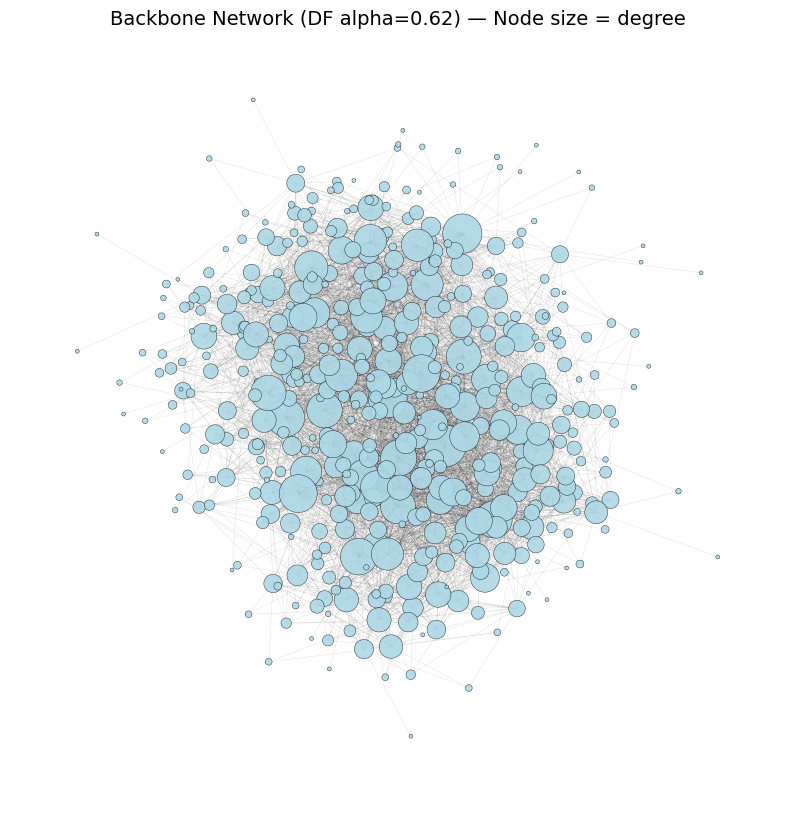

In [ ]:
# Assignment-compliant backbone plot (no color, size = total degree)
bb_nodes = max(nx.connected_components(backbone_w1), key=len)
BB = backbone_w1.subgraph(bb_nodes).copy()

node_size_deg_bb = [BB.degree(n) * 8 for n in BB.nodes()]
pos_bb = nx.forceatlas2_layout(BB, gravity=10)

plt.figure(figsize=(10,10))
nx.draw_networkx_edges(BB, pos_bb, width=0.15, alpha=0.25, edge_color="black")
nx.draw_networkx_nodes(
    BB, pos_bb,
    node_size=node_size_deg_bb,
    node_color="lightblue",
    edgecolors="black",
    linewidths=0.3,
    alpha=0.9
)
plt.title("Backbone Network (DF alpha=0.62) — Node size = degree", fontsize=14)
plt.axis('off')
plt.show()


In [ ]:
bc_back = nx.betweenness_centrality(backbone_w1)

#We print out only the first 5 results, to avoid printing out a long list
for node, value in list(bc_back.items())[:5]:
    print(f"{node}: {value}")


10cc: 0.002683306000831719
The Hollies: 0.00010633506048585414
Eric Clapton: 0.01765360859028401
rock music: 0.04009164346170857
Paul McCartney: 0.021024617895746518


This code measures how much each node (artist) acts as a bridge between others in the network, then displays the first 5 results to illustrate the concept without printing the full dataset.

In [ ]:
clust_orig = nx.average_clustering(weighted_rock_artist_graph1.to_undirected())
clust_back = nx.average_clustering(backbone_w1)
print(f"Clustering before: {clust_orig:.3f}, after: {clust_back:.3f}")


Clustering before: 0.234, after: 0.293


The average clustering increased from 0.234 to 0.293 after we applied the disparity filter.
This means that the backbone network became weaker, random links were removed, while strong, meaningful connections within communities were preserved.
As a result, the remaining nodes form tighter clusters, highlighting the core community structure of the rock artist network.

In [ ]:
assort_back = nx.degree_assortativity_coefficient(backbone_w1)
print(f"Degree assortativity of the backbone: {assort_back:.3f}")


Degree assortativity of the backbone: -0.160


The assortativity value of -0.160 means the backbone network is disassortative. Popular or well-connected nodes tend to link with smaller, less connected ones instead of other big hubs.

In [ ]:
deg_values = []
for node, degree in backbone_w1.degree():
    if degree > 0:
        deg_values.append(degree)

fit_backbone = powerlaw.Fit(deg_values, discrete=True)
print(f"Alpha (backbone): {fit_backbone.power_law.alpha:.2f}, xmin: {fit_backbone.power_law.xmin}")

fit_backbone = powerlaw.Fit(deg_values, discrete=True)
print(f"Alpha (backbone): {fit_backbone.power_law.alpha:.2f}, xmin: {fit_backbone.power_law.xmin}")


Calculating best minimal value for power law fit
Alpha (backbone): 3.37, xmin: 34.0
Calculating best minimal value for power law fit
Alpha (backbone): 3.37, xmin: 34.0


For nodes with a degree above 34, the degree distribution roughly follows a power-law pattern, but with a relatively steep slope (since alpha > 3).
A higher α value indicates that very high-degree nodes are rare, so the network is less dominated by superhubs compared to a classic scale-free network.

#### Backbone analysis

The network was processed using the Disparity Filter, to extract the backbone, to highlight the most significant relationships, while it reduced the its noise from weaker connections. The original network consisted 485 nodes and 6215 edges, with a density of 0.0512. After the backbone extraction, the network reduced to 463 nodes and 4313 edges, resulting a lower density of 0.0403. Approximately 28% of the edges were removed. It indicated that the less significant links were filtered, and the backbone retains only the most meaningful connections. 
Comparted tot he original network, the backbone’s average degree decreased from 24.71 to 18.63, that reflects that only the main central of the network remained.
Ont he other hand, the average clustering coefficient increased from 0.234 to 0.293 after the extraction. This means, that the backbone preserved tight-knit communities, with more densely interconnected nodes, even as the overall network became sparser. 
Moreover, the process didn’t fragment the network, the backbone remained a fully-connected component. 
The degree distribution follows a power-law pattern (alpha = 3.37, xmin = 34), indicating that a small number of nodes are highly connected, while most nodes maintain only a few links.


### Questions and answers from the Week 5 exercise:

- What is the relation between the band/mucisians you identified and their network neighbours? (e.g. did they sing a song together, did one write a song for the other?, etc ...). You don't need to come up with a grand theory of Rock Music here, I just want you to think about how links arise, why the links are there.
    - Each node represents a rock band, and the edges correspond to hyperlinks between their Wikipedia pages.
These links usually appear when bands or musicians have collaborated, shared members, or influenced each other’s music.
- Are there differences between reasons for out- and in-links? Again, there's no right answer here. I just want you to think about some of the reasons why links may occur in Wikipedia. Answer in your own words.
    - Out-links usually come from pages that reference or explain related artists, for example, band members, collaborations, or influences, while the in-links show how many other pages mention an artist, sometimes because they are more famous or made bigger influence.
Overall, out-links reflect connections a page makes, while in-links mostly reflect how important that artist is/was to others.

### Part 2 answer:

The original network consisted of 485 nodes, of which 481 were successfully assigned genre information. To identify the communities, we applied the Louvain algorithm, which detected 6 communities. This algorithm was chosen because it is fast and efficient, and it is explicitly designed to maximize modularity, making it a suitable measure of how well the communities are separated.

The sizes of the detected communities are as follows: [165, 107, 101, 93, 11, 4], which include both larger and smaller clusters. This indicates that the network exhibits an uneven but interpretable community structure.

The modularity value of the partition is 0.1035, which is significantly higher than the baseline value of 0.0174 computed from a random distribution. This suggests that the detected communities follow genuine, structured patterns rather than arising randomly. The moderate modularity value indicates a weak-to-moderate community structure, showing that while the network exhibits some genre-based grouping, there are also substantial cross-genre or inter-community connections.

The higher modularity compared to the random baseline confirms that the identified communities are not arbitrary but reflect real relational structures within the network.
